In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/WalkingKiwi_Tracks4.csv', index_col=0)
df.head()
df.shape

,name,type,time_h,length_km,minElevation,maxElevation,netElevation,totalAscent,lng,lat,coordinates,trackElevation,url,region
0,L. Wairoa Road End to Barrys Flat,Tramping Track,7.07,11.51,178.5,407.1,228.6,785.8,173.096578,-41.494357,"173.096578,-41.494357 173.096810,-41.494361 17...",192.003540039000000660962541587650775909423828...,-l-wairoa-road-end-to-barrys-flat,Tasman
1,Ngatuhoa Stream Track,Tramping Track,3.80,6.45,318.8,461.0,142.2,340.1,176.006116,-37.927966,"176.006116,-37.927966 176.006240,-37.927909 17...",325.382751464839998334355186671018600463867187...,-ngatuhoa-stream-track,Bay Of Plenty
2,(coastal) Smoothwater-staffordhut Route,Route,2.30,5.84,0.0,37.6,37.6,214.0,168.594405,-43.975153,"168.594405,-43.975153 168.594300,-43.975123 16...","1,0.317498326301569988583395343084703199565410...",-coastal-smoothwaterstaffordhut-route,West Coast
3,(inland) Smoothwater-staffordhut Route,Route,2.98,6.99,1.3,253.1,251.8,387.9,168.545144,-43.996206,"168.545144,-43.996206 168.545165,-43.996220 16...",2.98784279823299980805018094542901962995529174...,-inland-smoothwaterstaffordhut-route,West Coast
4,1000 Acres (1000 Ac Jcn to Pp Hut),Tramping Track,3.35,4.42,345.6,1099.0,753.4,679.6,172.331671,-41.649679,"172.331671,-41.649679 172.330260,-41.646983 17...","345.5771484375,476.229125976559998889570124447...",1000-acres-1000-ac-jcn-to-pp-hut,Tasman


(3075, 14)

In [7]:
trails = df[['name','type','time_h','length_km','netElevation','totalAscent','lng','lat','region']].copy(deep=True)
trails.head(2)

,name,type,time_h,length_km,netElevation,totalAscent,lng,lat,region
0,L. Wairoa Road End to Barrys Flat,Tramping Track,7.07,11.51,228.6,785.8,173.096578,-41.494357,Tasman
1,Ngatuhoa Stream Track,Tramping Track,3.80,6.45,142.2,340.1,176.006116,-37.927966,Bay Of Plenty


In [8]:
trails = pd.get_dummies(trails, columns=['type','region'])
trails.head(2)

,name,time_h,length_km,netElevation,totalAscent,lng,lat,type_Easy Tramping Track,type_Great Walk,type_Route,type_Short Walk,type_Short Walk(disabled),type_Track - historic,type_Tramping Track,type_Walking Track,region_Auckland,region_Bay Of Plenty,region_Canterbury,region_Chatham Islands,region_Gisborne,region_Hawkes Bay,region_ManawatuWanganui,region_Marlborough,region_Nelson,region_Northland,region_Otago,region_Southland,region_Taranaki,region_Tasman,region_Waikato,region_Wellington,region_West Coast
0,L. Wairoa Road End to Barrys Flat,7.07,11.51,228.6,785.8,173.096578,-41.494357,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Ngatuhoa Stream Track,3.80,6.45,142.2,340.1,176.006116,-37.927966,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Extract only some subset of columns to reduce computation time 
X = trails.drop(columns='name').values

# Standardize the features so that no feature dominates the distance computations due to unit scale
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [11]:
test = trails.drop(columns='name')[0:1].values
test = scaler.transform(test)

# Distance from all other cars
distances = euclidean_distances(X, test)
distances = distances.reshape(-1)   # Before it was (n_cars, 1)

# Find the 3 indices with the minimum distance (highest similarity) to the car we're looking at
ordered_indices = distances.argsort()
closest_indices = ordered_indices[1:6]

# Get the cars for these indices
closest_trails = trails.iloc[closest_indices]
closest_trails

,name,time_h,length_km,netElevation,totalAscent,lng,lat,type_Easy Tramping Track,type_Great Walk,type_Route,type_Short Walk,type_Short Walk(disabled),type_Track - historic,type_Tramping Track,type_Walking Track,region_Auckland,region_Bay Of Plenty,region_Canterbury,region_Chatham Islands,region_Gisborne,region_Hawkes Bay,region_ManawatuWanganui,region_Marlborough,region_Nelson,region_Northland,region_Otago,region_Southland,region_Taranaki,region_Tasman,region_Waikato,region_Wellington,region_West Coast
1475,Matiri Valley Track (mcc Hut to Hur Hut),7.43,12.37,378.1,752.0,172.364479,-41.587552,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1054,Karamea Bend Hut to Crow River,6.00,9.71,157.0,688.1,172.468717,-41.292658,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2659,Tiraumea Track - Tutaki Rd to T.hut,8.15,14.14,250.4,643.1,172.484376,-41.838739,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
628,End Grass Flats to Cecil Kings Hut,5.72,9.22,157.1,660.3,172.479318,-41.466902,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2217,Robert Ridge Route,5.92,9.20,380.2,788.2,172.748239,-41.888042,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
for i in df.trackElevation[0:1]:
    i = i.split(',')
    print(i)

['192.003540039000000660962541587650775909423828125', '198.42913818400000991459819488227367401123046875', '197.561325073000006113943527452647686004638671875', '196.842178345000007766429916955530643463134765625', '195.2167205810000041310559026896953582763671875', '195.03907775900000842739245854318141937255859375', '187.401992798000009088355000130832195281982421875', '184.097229004000013219410902820527553558349609375', '179.4874877930000138803734444081783294677734375', '179.12120056200001272372901439666748046875', '186.95164489699999421645770780742168426513671875', '194.011581420999988267794833518564701080322265625', '196.716445923000009088355000130832195281982421875', '196.41477966299999025068245828151702880859375', '189.512741089000002148168277926743030548095703125', '191.2785491939999928945326246321201324462890625', '194.030715942000000495681888423860073089599609375', '197.564453125', '197.61450195300000132192508317530155181884765625', '195.42897033700000974931754171848297119140625', 

In [11]:
df.trackElevation = df.trackElevation.apply(lambda x: x.split(','))

In [30]:
steps = 

In [ ]:
def plot_elevation(df, ):
    
    x = np.arange(0,df.length_km,(df.length_km[0]/len(df.trackElevation[0])))
    y

In [34]:
df.region.unique()

array(['Tasman', 'Bay Of Plenty', 'West Coast', 'Otago', 'Canterbury',
       'Wellington', 'Southland', 'Hawkes Bay', 'Taranaki', 'Northland',
       'ManawatuWanganui', 'Gisborne', 'Marlborough', 'Auckland',
       'Waikato', 'Nelson', 'Chatham Islands'], dtype=object)

In [8]:
types = sorted(df.type.unique())[1]
types

'Great Walk'

In [9]:
df[df['type']==types]

,name,type,time_h,length_km,minElevation,maxElevation,netElevation,totalAscent,lng,lat,coordinates,trackElevation,url,region
92,Atct - Anchorage Track Junc to Torrent Bay,Great Walk,2.33,5.71,0.0,18.9,18.9,256.0,173.049722,-40.944392,"173.049722,-40.944392 173.049762,-40.944424 17...","0,0.549759507179260031861645074968691915273666...",atct-anchorage-tk-junc-to-torrent-bay,Tasman
93,Atct - Bark Bay to Onetahuti,Great Walk,3.03,6.39,0.0,104.4,104.4,542.0,173.052970,-40.879882,"173.052970,-40.879882 173.052940,-40.879889 17...",16.2640895843510016050004196586087346076965332...,atct-bark-bay-to-onetahuti,Tasman
94,Atct - Inland Track Junct. to Anchorage Track,Great Walk,2.90,6.95,61.2,120.6,59.4,347.2,173.046445,-40.963137,"173.046445,-40.963137 173.046137,-40.963158 17...",78.6510009765620026200849679298698902130126953...,atct-inland-tk-junct-to-anchorage-tk,Tasman
95,Atct - Marahau to Inland Track Junction,Great Walk,1.08,2.69,0.0,40.6,40.6,112.4,173.027790,-40.989363,"173.027790,-40.989363 173.027780,-40.989366 17...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.07...",atct-marahau-to-inland-tk-junction,Tasman
96,Atct - N. Torrent Bay to Bark Bay,Great Walk,3.60,6.76,0.5,165.3,164.8,804.3,173.049599,-40.932009,"173.049599,-40.932009 173.049640,-40.932275 17...","67.990234375,72.689285278300005188611976336687...",atct-n-torrent-bay-to-bark-bay,Tasman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,Waihohonu Track,Great Walk,2.17,5.77,970.0,1100.0,130.0,143.7,175.679609,-39.209213,"175.679609,-39.209213 175.679633,-39.209184 17...","970,972,973.55078125,974,974.94506835938000222...",waihohonu-track,Waikato
2908,Wainui Carpark to Gibbs Track Junction,Great Walk,1.52,2.78,0.9,201.2,200.3,353.6,172.963833,-40.799544,"172.963833,-40.799544 172.963776,-40.799553 17...","9.91548824310302734375,9.8158721923828125,9.83...",wainui-carpark-to-gibbs-track-junction,Tasman
2917,Waiopaoa to Panekire,Great Walk,4.18,7.87,592.1,828.3,236.2,937.0,176.993332,-38.808958,"176.993332,-38.808958 176.993321,-38.808993 17...",592.132690429690001110429875552654266357421875...,waiopaoa-to-panekire,Hawkes Bay
3027,Whakahoro Landing Track (retaruke River,Great Walk,0.02,0.03,86.4,96.8,10.4,0.0,175.074240,-39.108626,"175.074240,-39.108626 175.074222,-39.108881",86.4342651367190057953848736360669136047363281...,whakahoro-landing-track-retaruke-river,ManawatuWanganui


In [5]:
types = sorted(df.type.unique())
types.insert(0,'All Route Types')
types

['All Route Types',
 'Easy Tramping Track',
 'Great Walk',
 'Route',
 'Short Walk',
 'Short Walk(disabled)',
 'Track - historic',
 'Tramping Track',
 'Walking Track']

In [7]:
df.columns

Index(['name', 'type', 'time_h', 'length_km', 'minElevation', 'maxElevation',
       'netElevation', 'totalAscent', 'lng', 'lat', 'coordinates',
       'trackElevation', 'url', 'region'],
      dtype='object')

In [6]:
types[1]
df[df['type']==types[1]]

'Easy Tramping Track'

,name,type,time_h,length_km,minElevation,maxElevation,netElevation,totalAscent,lng,lat,coordinates,trackElevation,url,region
23,Ahukawakawa Track,Easy Tramping Track,1.45,3.34,919.2,1029.3,110.1,197.1,174.048112,-39.263505,"174.048112,-39.263505 174.048131,-39.263477 17...",953.492797851559998889570124447345733642578125...,ahukawakawa-track,Taranaki
27,Akersten Bay Track,Easy Tramping Track,0.10,0.13,3.3,41.5,38.2,38.1,173.046753,-40.972495,"173.046753,-40.972495 173.046887,-40.972432 17...",3.32456278800964399877670985006261616945266723...,akersten-bay-track,Tasman
53,Anchorage Access Tracks,Easy Tramping Track,1.45,2.93,0.0,103.3,103.3,284.5,173.052647,-40.963414,"173.052647,-40.963414 173.052605,-40.963253 17...",12.6558380127000003056991772609762847423553466...,anchorage-access-tracks,Tasman
72,Apple Tree Bay Track,Easy Tramping Track,0.05,0.12,0.0,9.4,9.4,9.4,173.038076,-40.982377,"173.038076,-40.982377 173.038127,-40.982205 17...","0,0,0,0,0.090360887348651885986328125,2.705009...",apple-tree-bay-track,Tasman
161,Big Bend Track,Easy Tramping Track,1.27,2.96,115.3,202.0,86.7,172.8,174.976820,-41.340665,"174.976820,-41.340665 174.977474,-41.340627 17...",115.342857360839801117435854393988847732543945...,big-bend-track,Wellington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,Whangatawhia to Okahu Rd Track,Easy Tramping Track,2.67,6.27,550.8,700.0,149.2,343.2,176.800175,-38.720533,"176.800175,-38.720533 176.800251,-38.720496 17...","554.663330078125,554,554,554.4117431640625,554...",whangatawhia-to-okahu-rd-track,Bay Of Plenty
3081,White Pine Track,Easy Tramping Track,2.25,4.73,194.0,324.0,130.0,401.2,170.951182,-44.145921,"170.951182,-44.145921 170.951389,-44.145976 17...",245.483413696000013715092791244387626647949218...,white-pine-track,Canterbury
3105,Woolshed Ck Crpk to Woolshed Creek Hut,Easy Tramping Track,2.47,4.93,551.0,928.9,377.9,492.8,171.300716,-43.630790,"171.300716,-43.630790 171.300520,-43.630510 17...","551,551.2882080078125,553.58343505859375,556.0...",woolshed-ck-crpk-to-woolshed-creek-hut,Canterbury
3106,Woolshed Creek Hut (inc) to Pinnacles Ht,Easy Tramping Track,2.90,6.13,811.0,1178.5,367.5,517.7,171.325827,-43.601263,"171.325827,-43.601263 171.325906,-43.601126 17...","811,811.0633544921875,812.57025146484375,812,8...",woolshed-creek-hut-inc-to-pinnacles-ht,Canterbury


In [11]:
df.length_km.describe()

count    3075.00000
mean        4.35319
std         4.52326
min         0.00000
25%         1.13000
50%         3.10000
75%         5.93000
max        42.34000
Name: length_km, dtype: float64

In [17]:
rec_hour, rec_min = str(df.time_h[0]).split('.')
rec_min = round(int(rec_min)*.6,0)

In [18]:
rec_hour
rec_min

'7'

4.0

In [127]:
def euclidean_rec(title, df, num_rec=5):
    # change route type and regions into dummy values -- if filtered, the dummies will update appropriately for the current df
    trail_recomm = pd.get_dummies(df[['name','type','time_h','length_km','netElevation','totalAscent','lng','lat','region']], columns=['type','region'])
    X = trail_recomm.drop(columns='name').values
    # Standardize the features so that no feature dominates the distance computations due to unit scale
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    # the hike you searched for
    hike_lookup = trail_recomm.loc[trail_recomm['name'] == title]
    hike_lookup = hike_lookup.drop(columns='name').values
    hike_lookup = scaler.transform(hike_lookup)
    # Distance from all other hikes
    distances = euclidean_distances(X, hike_lookup)
    distances = distances.reshape(-1)   
    # Find the num_rec indices with the minimum distance (highest similarity) to the hike we're looking at
    ordered_indices = distances.argsort()
    closest_indices = ordered_indices[1:num_rec+1]
    # Get the hikes for these indices abnd relate back to original df
    closest_trails = trail_recomm.iloc[closest_indices]
    hike_names = closest_trails['name'].tolist()
    # go back to df
    result_df = df[df['name'].isin(hike_names)][['name','region','type','time_h','length_km','totalAscent','trackElevation']]
    return result_df

search term:  Roys Peak Track
title:  Ben Lomond Walkway , region:  Otago , type:  Walking Track , hours:  2  mins:  34 , length:  4.78 , ascent:  975.7


[Text(0.5, 1.0, 'Ben Lomond Walkway'),
 Text(0.5, 0, 'Distance (km)'),
 Text(0, 0.5, 'Elevation (m)')]

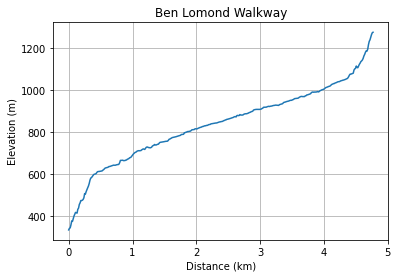

title:  Isthmus Peak Track , region:  Otago , type:  Walking Track , hours:  4  mins:  3 , length:  7.7 , ascent:  1775.6


[Text(0.5, 1.0, 'Isthmus Peak Track'),
 Text(0.5, 0, 'Distance (km)'),
 Text(0, 0.5, 'Elevation (m)')]

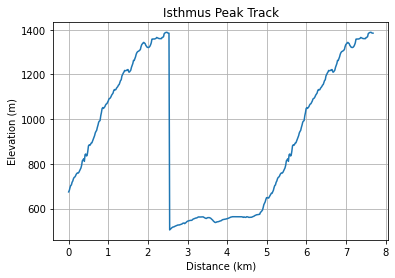

title:  Judah Track , region:  Otago , type:  Walking Track , hours:  2  mins:  4 , length:  6.84 , ascent:  856.7


[Text(0.5, 1.0, 'Judah Track'),
 Text(0.5, 0, 'Distance (km)'),
 Text(0, 0.5, 'Elevation (m)')]

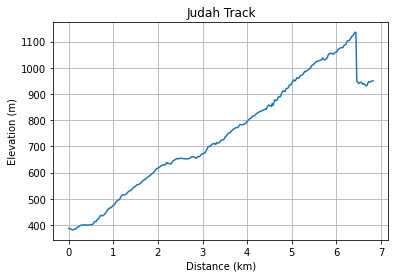

title:  Locharburn Track , region:  Otago , type:  Tramping Track , hours:  5  mins:  15 , length:  6.71 , ascent:  1138.4


[Text(0.5, 1.0, 'Locharburn Track'),
 Text(0.5, 0, 'Distance (km)'),
 Text(0, 0.5, 'Elevation (m)')]

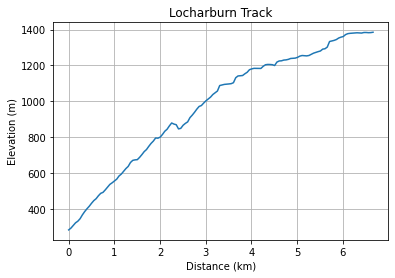

title:  Omeo Gully Track , region:  Otago , type:  Tramping Track , hours:  6  mins:  3 , length:  9.32 , ascent:  1162.1


[Text(0.5, 1.0, 'Omeo Gully Track'),
 Text(0.5, 0, 'Distance (km)'),
 Text(0, 0.5, 'Elevation (m)')]

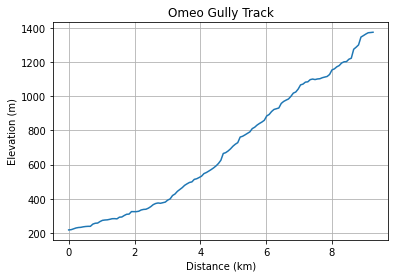

In [163]:
title = 'Roys Peak Track'
if title is not None:
    print('search term: ',title)
    results = euclidean_rec(title, df)
    #results = cosine_rec(search_term, cos_sim_matrix, df, num_of_rec=num_rec)
    for row in results.iterrows():
        rec_title = row[1][0]
        rec_region = row[1][1]
        rec_type = row[1][2]
        rec_time = row[1][3]
        rec_hour, rec_min = str(rec_time).split('.')
        rec_min = int(int(rec_min)*.60)
        rec_length = row[1][4]
        rec_ascent = row[1][5]
        rec_elev = row[1][6]
        rec_elev = str(rec_elev).split(',')
        rec_elev = [float(i) for i in rec_elev]
        print('title: ',rec_title,', region: ',rec_region,', type: ',rec_type,', hours: ',rec_hour,' mins: ',rec_min,', length: ',rec_length,', ascent: ',rec_ascent)
        fig,ax=plt.subplots();
        fig = sns.lineplot(y=rec_elev, x=np.arange(start=0, stop=float(rec_length), step=rec_length/len(rec_elev)), ax=ax);
        ax.set(title=rec_title, xlabel='Distance (km)', ylabel='Elevation (m)');
        ax.grid();
        plt.show();
        #chart = pd.DataFrame(rec_elev,np.arange(start=0, stop=float(rec_length), step=len(rec_elev)))
        #chart.plot(kind='line')

In [ ]:
# function to vectorize + find cosine similarity matrix
def vectorize_text_cosine(data):
    count_vect = CountVectorizer()
    cv_mat = count_vect.fit_transform(data)
    # get cosine
    cos_sim_matrix = cosine_similarity(cv_mat)
    return cos_sim_matrix

# function for recommendation system
@st.cache
def cosine_rec(title,cos_sim_matrix,df,num_of_rec=5):
    # indices of the hikes
    hike_indices = pd.Series(df.index, index=df['name']).drop_duplicates()
    #index of hike
    idx = hike_indices[title]
    # look into cosine matrix for that index
    sim_scores = list(enumerate(cos_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    selected_hike_indices = [i[0] for i in sim_scores[1:]]
    selected_hike_scores = [i[1] for i in sim_scores[1:]]
    # get dataframe and title
    result_df = df.iloc[selected_hike_indices]
    result_df['similarity_score'] = selected_hike_scores
    final_recommened_hikes = result_df[['name','region','type','time_h','length_km','totalAscent','similarity_score']]
    return final_recommened_hikes[:num_of_rec]